In [149]:
library('igraph')

fb_data <- matrix(scan("facebook_combined.txt"), ncol=2, byrow=TRUE)
fb_data = fb_data + 1
facebook_graph = graph_from_edgelist(fb_data, directed = FALSE)

In [155]:
# Q5
fb_ego_graph = function(g) {
    user_neighbors = neighbors(g, 1)
    user_vertices = c(1, user_neighbors)
    user_network = induced_subgraph(g, user_vertices)
    plot(user_network, edge.arrow.size=.1, vertex.size=5, vertex.label=NA, main="node ID 1 ego network")
    
    print(paste("Network ID 1 number of nodes: ", vcount(user_network)))
    print(paste("Network ID 1 number of edges: ", ecount(user_network)))
    
    # Q6
    print(paste("Network ID 1 diameter: ", diameter(user_network)))
}

# Q8
fb_core = function(g) {
    cores = c()
    degree_averages = c()
    for(node in V(g)){
        num_neighbors = length(neighbors(g,node))
        if(num_neighbors > 200){
            degree_averages = c(degree_averages, degree(g, node))
            cores = c(cores,node)
        } 
    }

    print(paste('Number of core nodes: ', length(cores)))
    print(paste('Average degree: ', mean(degree_averages)))
}

# Q9
# Code provided by TA
core_communities = function(g, core_list=c(1,108,349,484,1087)) {
    for (core_id in core_list) {
        user_neighbors = neighbors(g, core_id)
        user_vertices = c(core_id, user_neighbors)
        user_network = induced_subgraph(g, user_vertices)

        fast_greedy = cluster_fast_greedy(user_network)
        edge_betweenness = cluster_edge_betweenness(user_network)
        infomap = cluster_infomap(user_network)

        par(mfrow=c(1,3))
        options(repr.plot.width=15, repr.plot.height=4)
        plot(user_network, mark.groups=groups(fast_greedy), vertex.color=fast_greedy$membership, vertex.size=6, vertex.label=NA, main=paste("Fast Greedy for NodeID: ",node_id))
        cat(sprintf("        Modularity of Fast Greedy: %0.3f", modularity(fast_greedy)))
        plot(user_network, mark.groups=groups(edge_betweenness), vertex.color=edge_betweenness$membership, vertex.size=6, vertex.label=NA, main=paste("Edge Betweenness for NodeID: ",node_id))
        cat(sprintf("        Modularity of Edge Betweenness: %0.3f", modularity(edge_betweenness)))
        plot(user_network, mark.groups=groups(infomap), vertex.color=infomap$membership, vertex.size=6, vertex.label=NA, main=paste("Infomap for NodeID: ",node_id))
        cat(sprintf("        Modularity of Infomap: %0.3f", modularity(infomap)))
    }
}

# Code provided by TA
coreless_communities = function(g, core_list=c(1,108,349,484,1087)) {
    for (core_id in core_list) {
        user_neighbors = neighbors(g, core_id)
        user_vertices = c(core_id, user_neighbors)
        user_network = induced_subgraph(g, user_vertices)
        user_network = delete_vertices(user_network, core_id)

        fast_greedy = cluster_fast_greedy(user_network)
        edge_betweenness = cluster_edge_betweenness(user_network)
        infomap = cluster_infomap(user_network)

        par(mfrow=c(1,3))
        options(repr.plot.width=15, repr.plot.height=4)
        plot(user_network, mark.groups=groups(fast_greedy), vertex.color=fast_greedy$membership, vertex.size=6, vertex.label=NA, main=paste("Fast Greedy for NodeID: ",node_id))
        cat(sprintf("        Modularity of Fast Greedy: %0.3f", modularity(fast_greedy)))
        plot(user_network, mark.groups=groups(edge_betweenness), vertex.color=edge_betweenness$membership, vertex.size=6, vertex.label=NA, main=paste("Edge Betweenness for NodeID: ",node_id))
        cat(sprintf("        Modularity of Edge Betweenness: %0.3f", modularity(edge_betweenness)))
        plot(user_network, mark.groups=groups(infomap), vertex.color=infomap$membership, vertex.size=6, vertex.label=NA, main=paste("Infomap for NodeID: ",node_id))
        cat(sprintf("        Modularity of Infomap: %0.3f", modularity(infomap)))
    }
}

[1] "Network ID 1 number of nodes:  348"
[1] "Network ID 1 number of edges:  2866"
[1] "Network ID 1 diameter:  2"


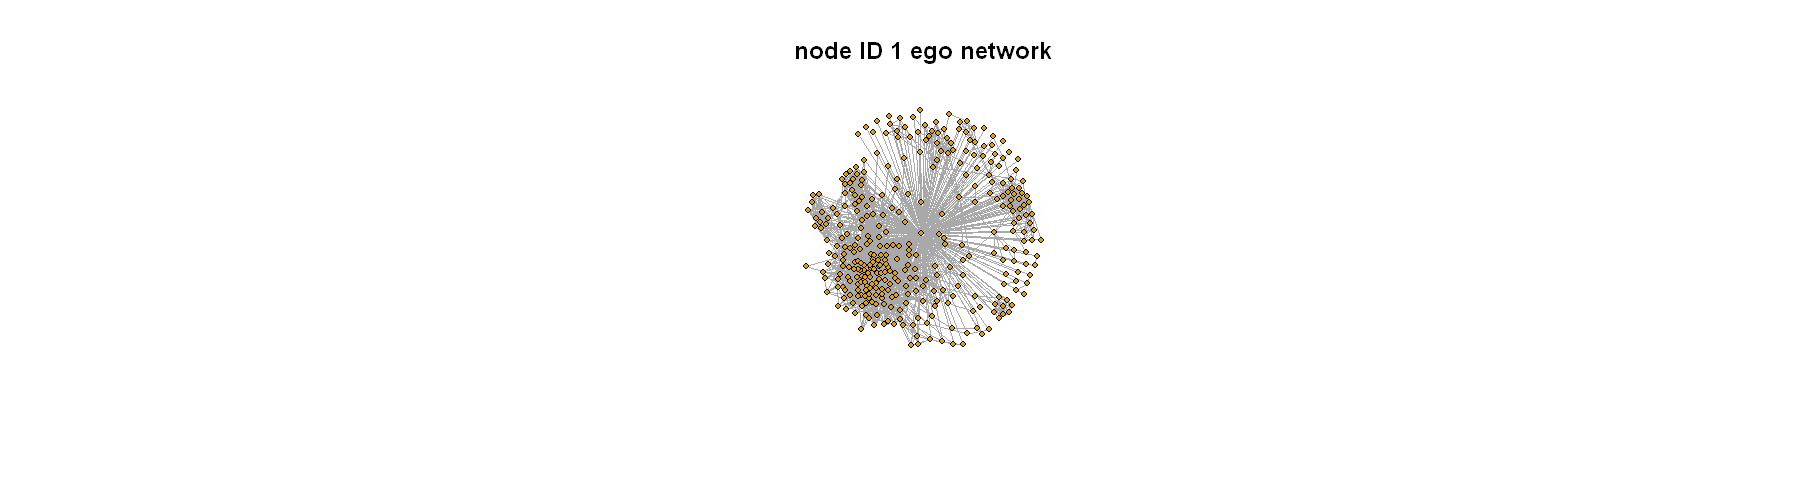

In [156]:
fb_ego_graph(facebook_graph)

In [124]:
fb_core(facebook_graph)

[1] "Number of core nodes:  40"
[1] "Average degree:  279.375"


        Modularity of Fast Greedy: 0.413        Modularity of Edge Betweenness: 0.353        Modularity of Infomap: 0.389        Modularity of Fast Greedy: 0.436        Modularity of Edge Betweenness: 0.507

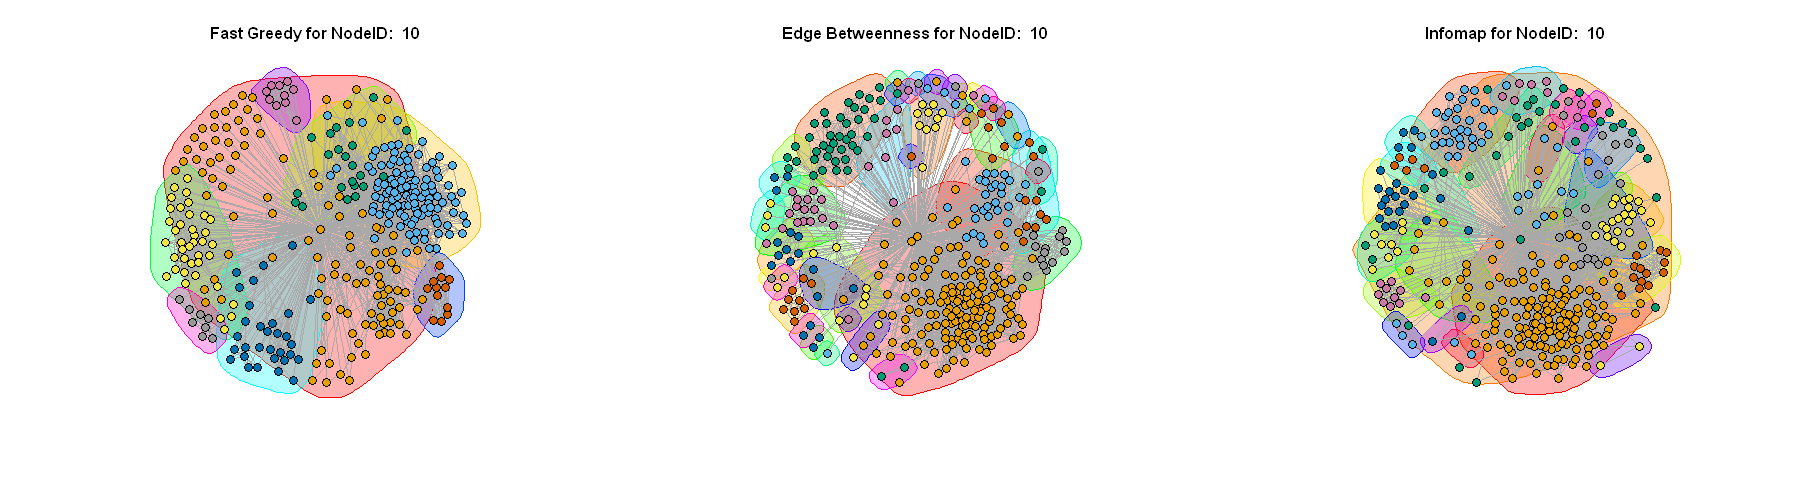

        Modularity of Infomap: 0.508        Modularity of Fast Greedy: 0.252        Modularity of Edge Betweenness: 0.134

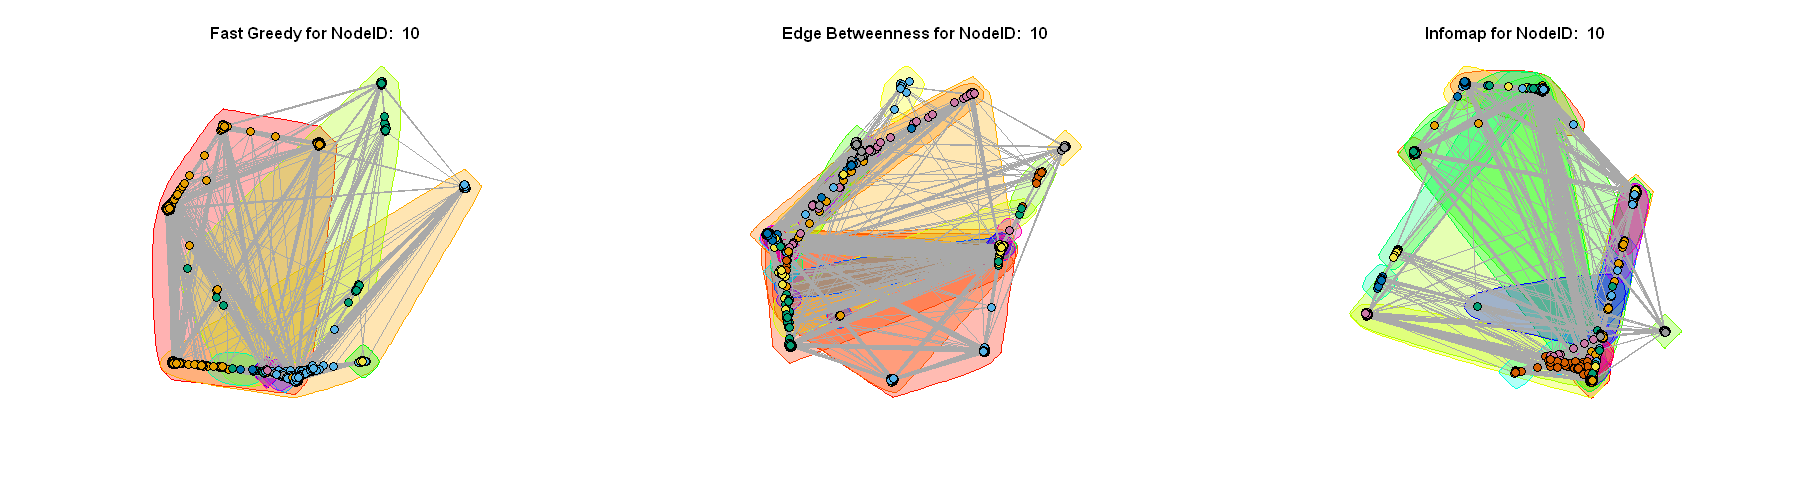

        Modularity of Infomap: 0.204        Modularity of Fast Greedy: 0.507        Modularity of Edge Betweenness: 0.489

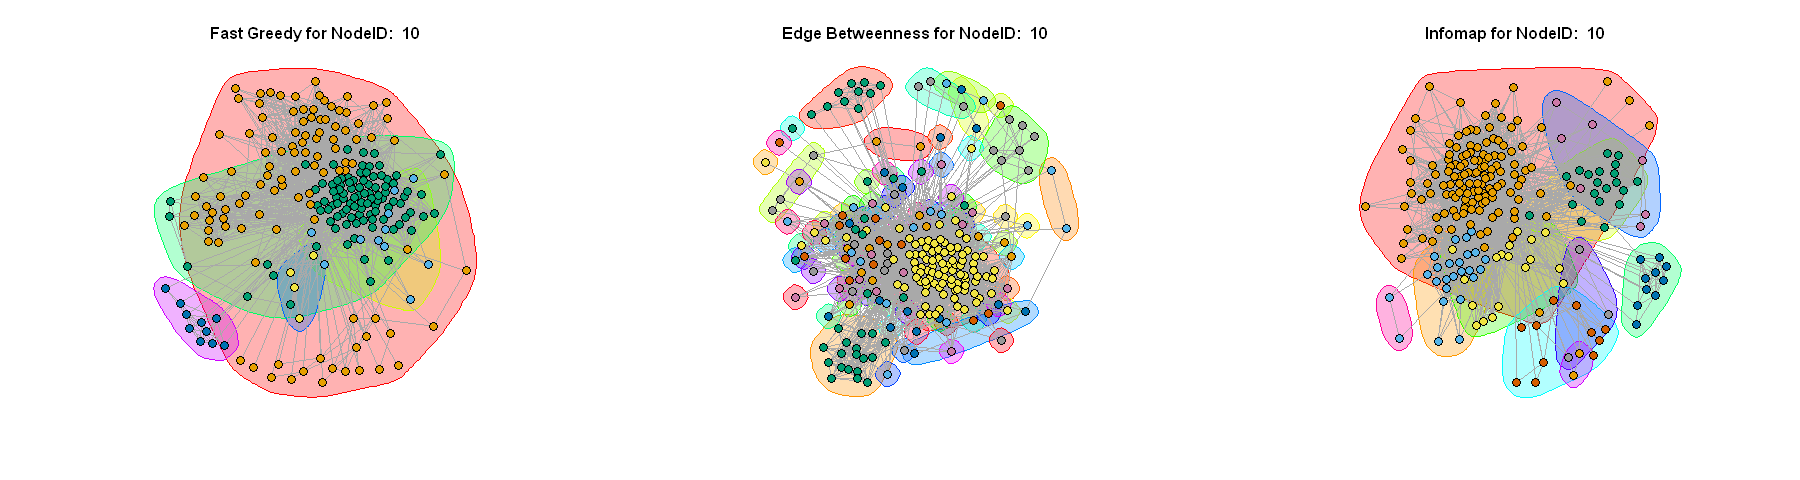

        Modularity of Infomap: 0.515        Modularity of Fast Greedy: 0.146        Modularity of Edge Betweenness: 0.028

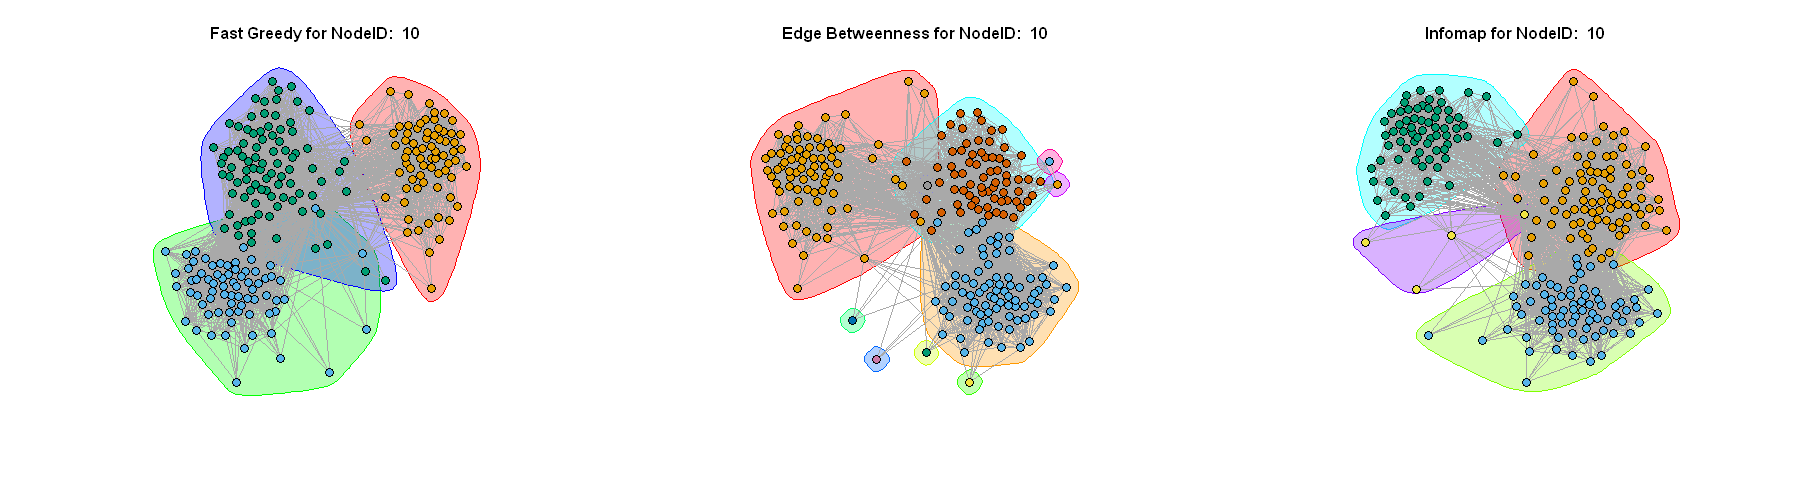

        Modularity of Infomap: 0.027

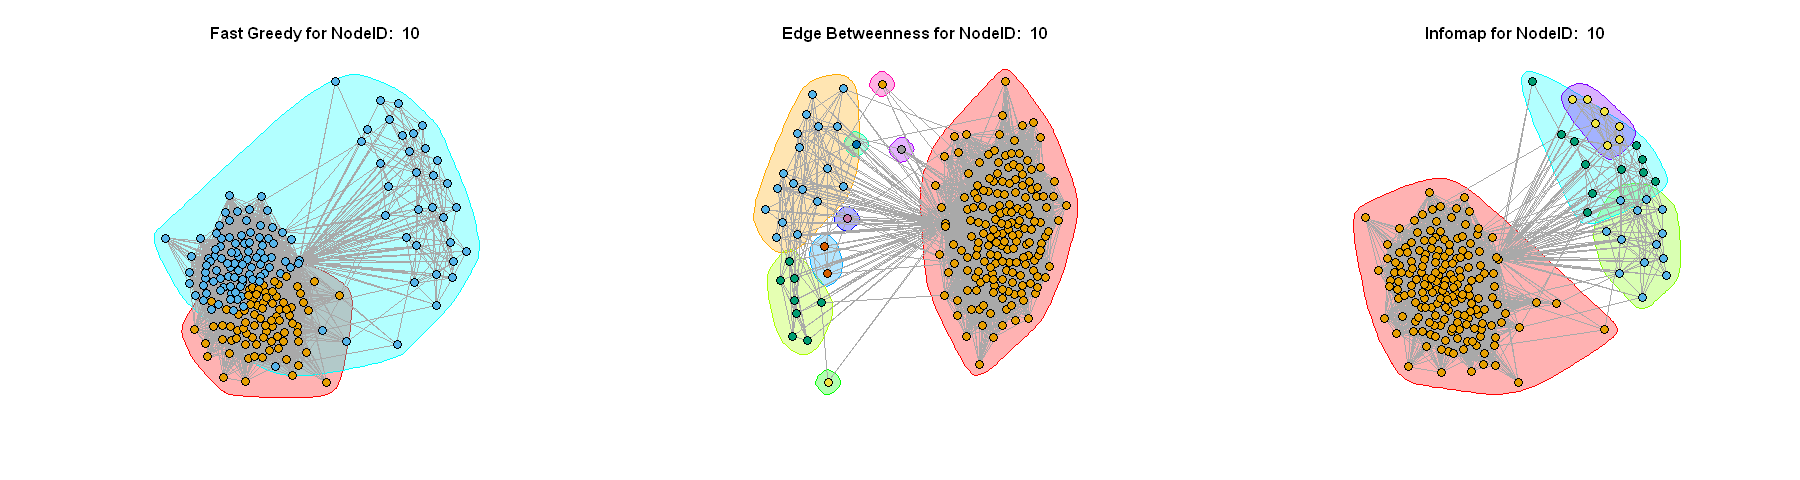

In [126]:
core_communities(facebook_graph)

        Modularity of Fast Greedy: 0.448        Modularity of Edge Betweenness: 0.416        Modularity of Infomap: 0.418        Modularity of Fast Greedy: 0.729        Modularity of Edge Betweenness: 0.743

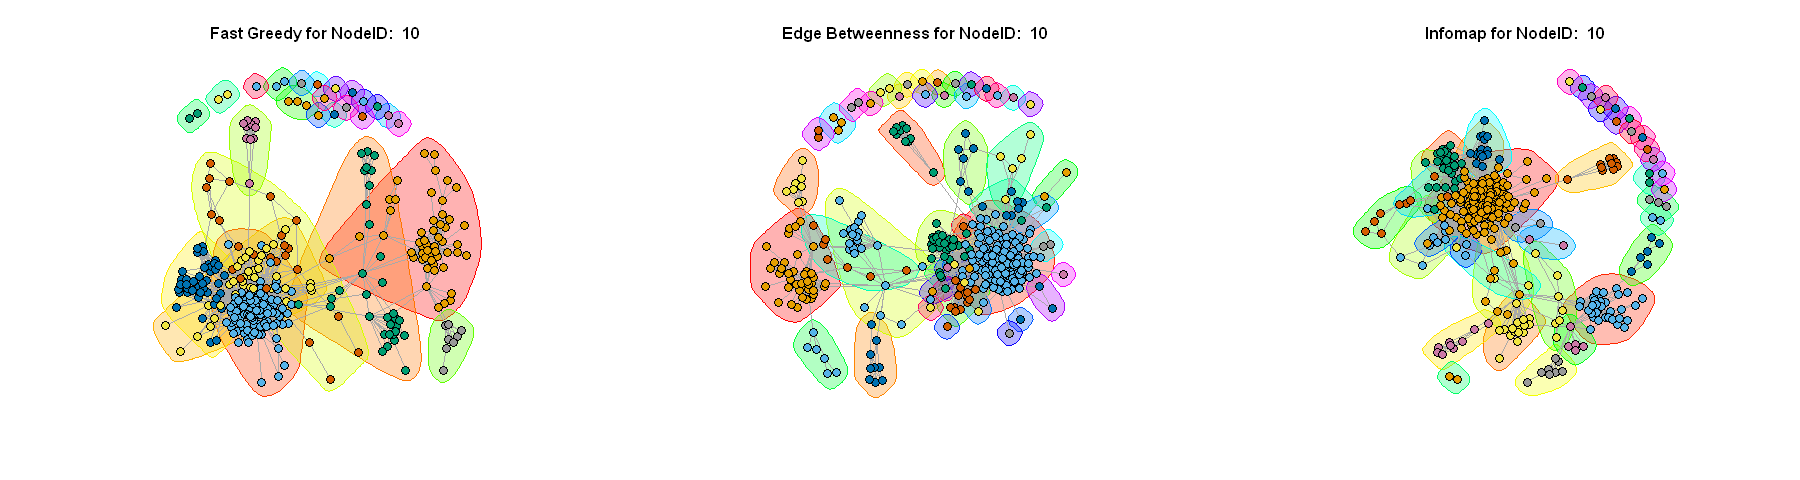

        Modularity of Infomap: 0.725        Modularity of Fast Greedy: 0.472        Modularity of Edge Betweenness: 0.458

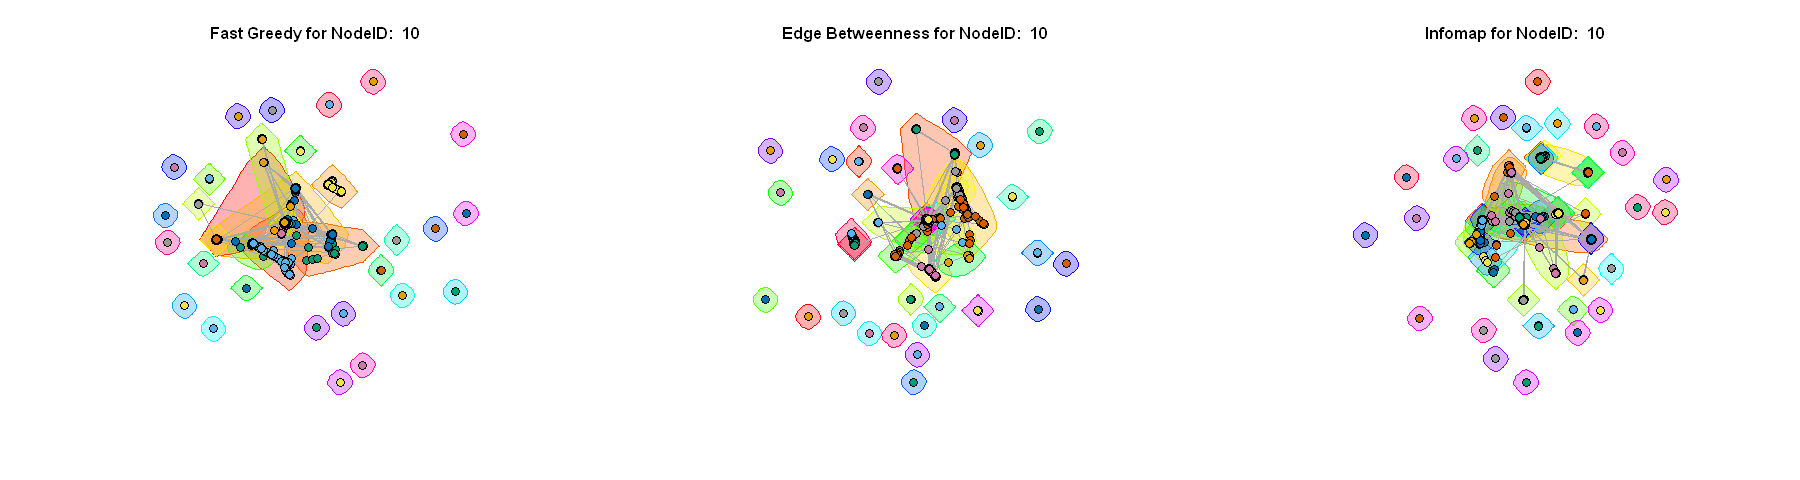

        Modularity of Infomap: 0.461        Modularity of Fast Greedy: 0.679        Modularity of Edge Betweenness: 0.688

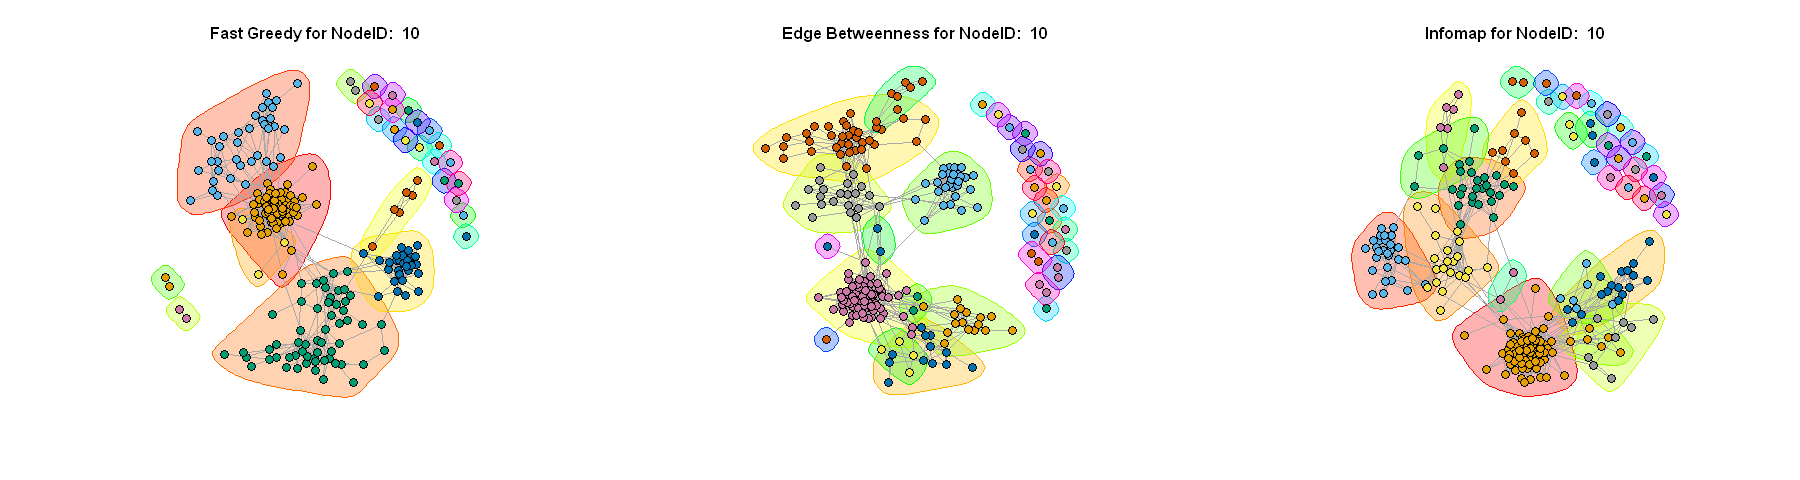

        Modularity of Infomap: 0.673        Modularity of Fast Greedy: 0.813        Modularity of Edge Betweenness: 0.822

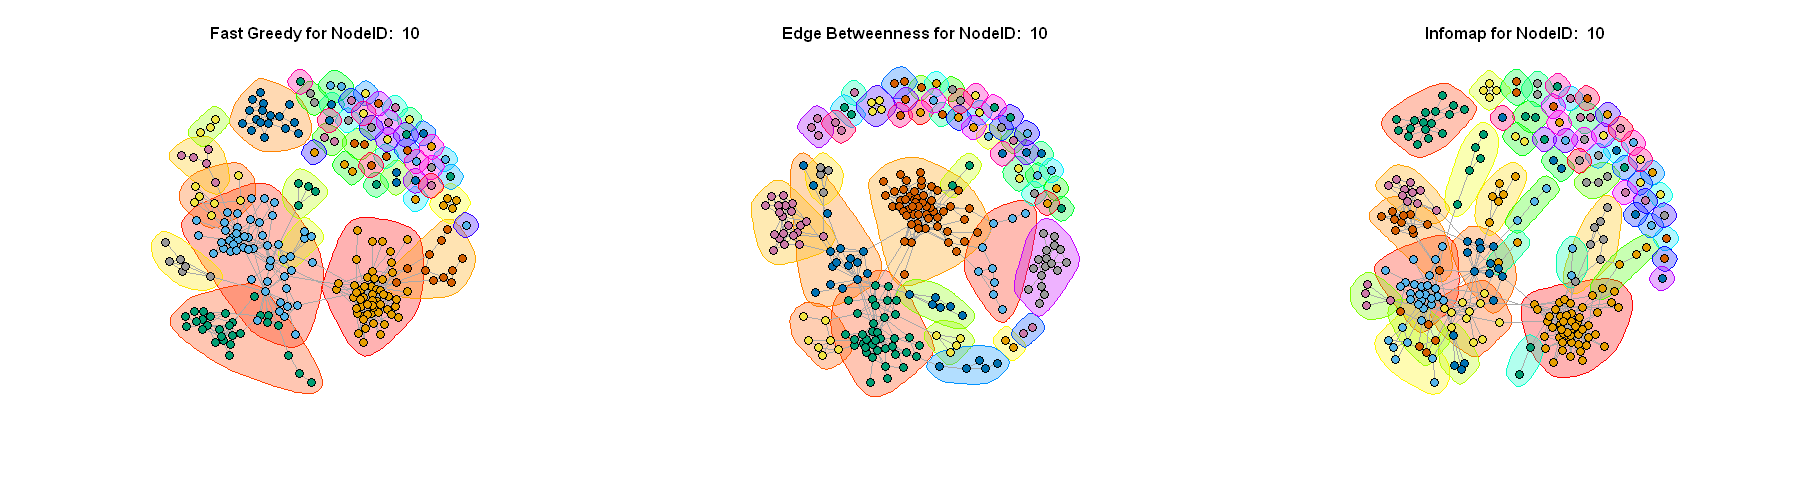

        Modularity of Infomap: 0.817

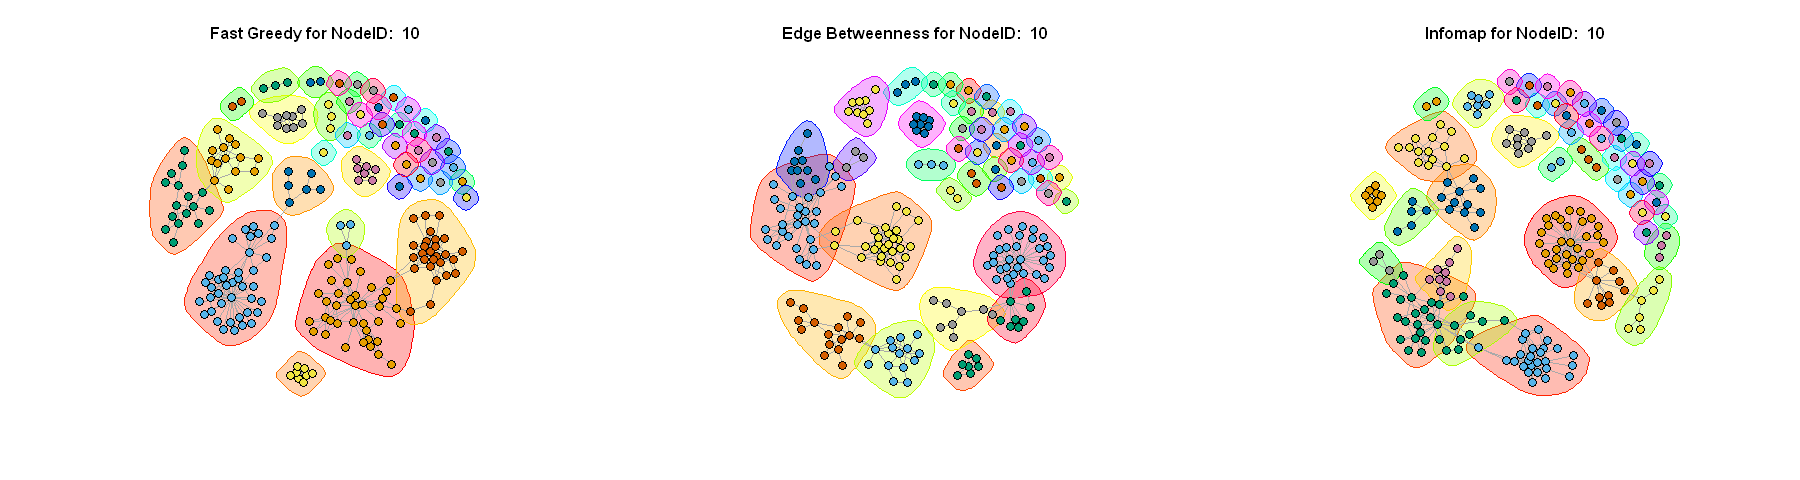

In [79]:
coreless_communities(facebook_graph)

In [172]:
# Q12
get_mutuals = function(g, core, node) {
    return (intersection(neighbors(g, core), neighbors(g, node)))
}

embeddedness = function(g, core, node) {
    return(length(get_mutuals(g, node, core)))
}

dispersion = function(g, core, node) {
    modified_g = delete_vertices(g, core)
    modified_g = delete_vertices(g, node)
    
    mutuals = get_mutuals(g, node, core)
    dist = distances(modified_g, v=mutuals$name, to=mutuals$name)

    dist[is.infinite(dist)] = (diameter(modified_g) + 10)
    return(sum(dist))
}

embed_and_distr = function(g, core_list=c(1,108,349,484,1087)) {
    for (core in core_list) {
        user_neighbors = neighbors(g, core)
        user_vertices = c(core, user_neighbors)
        user_network = induced_subgraph(g, user_vertices)

        embeds = c()
        disps = c()
        for (node in V(user_network)) {
            if (node != core) {
                embeds = c(embeds, embeddedness(user_network, core, node))
                disps = c(disps, dispersion(user_network, core, node))
            }
        }
#         plot(disps, main=paste('Distribution of Dispersion for core node:', core))
#         plot(embeds, main=paste('Distribution of Embeddedness for core node:', core))
    }
}

In [170]:
embed_and_distr(facebook_graph)

[1] 1
[1] 2
[1] 3
[1] 4
[1] 5
[1] 6
[1] 7
[1] 8
[1] 9
[1] 10
[1] 11
[1] 12
[1] 13
[1] 14
[1] 15
[1] 16
[1] 17
[1] 18
[1] 19
[1] 20
[1] 21
[1] 22
[1] 23
[1] 24
[1] 25
[1] 26
[1] 27
[1] 28
[1] 29
[1] 30
[1] 31
[1] 32
[1] 33
[1] 34
[1] 35
[1] 36
[1] 37
[1] 38
[1] 39
[1] 40
[1] 41
[1] 42
[1] 43
[1] 44
[1] 45
[1] 46
[1] 47
[1] 48
[1] 49
[1] 50
[1] 51
[1] 52
[1] 53
[1] 54
[1] 55
[1] 56
[1] 57
[1] 58
[1] 59
[1] 60
[1] 61
[1] 62
[1] 63
[1] 64
[1] 65
[1] 66
[1] 67
[1] 68
[1] 69
[1] 70
[1] 71
[1] 72
[1] 73
[1] 74
[1] 75
[1] 76
[1] 77
[1] 78
[1] 79
[1] 80
[1] 81
[1] 82
[1] 83
[1] 84
[1] 85
[1] 86
[1] 87
[1] 88
[1] 89
[1] 90
[1] 91
[1] 92
[1] 93
[1] 94
[1] 95
[1] 96
[1] 97
[1] 98
[1] 99
[1] 100
[1] 101
[1] 102
[1] 103
[1] 104
[1] 105
[1] 106
[1] 107
[1] 108
[1] 109
[1] 110
[1] 111
[1] 112
[1] 113
[1] 114
[1] 115
[1] 116
[1] 117
[1] 118
[1] 119
[1] 120
[1] 121
[1] 122
[1] 123
[1] 124
[1] 125
[1] 126
[1] 127
[1] 128
[1] 129
[1] 130
[1] 131
[1] 132
[1] 133
[1] 134
[1] 135
[1] 136
[1] 137
[1] 138
[1] 

ERROR: Error in neighbors(g, node): At type_indexededgelist.c:750 : cannot get neighbors, Invalid vertex id


In [137]:
# Q13
max_dispersion = function(g, core_list=c(1,108,349,484,1087)) {
    for (core in core_list) {
        user_neighbors = neighbors(g, core)
        user_vertices = c(core, user_neighbors)
        user_network = induced_subgraph(g, user_vertices)

        max_node =  NA
        max_dispersion = 0

        for (node in V(user_network)) {
            disp = dispersion(user_network, core, node)
            if(disp > max_dispersion && node != core) {
                max_dispersion = disp
                max_node = node
            }
        }
        
        community = fastgreedy.community(user_network)

        edge_color = rep("gray", length(E(user_network)))
        edge_weight = rep(0.5, length(E(user_network)))
        node_color = rep(community$membership, length(V(user_network)))
        node_size = rep(4, length(V(user_network)))
        node_label = rep(NA, length(V(user_network)))

        edge_color[which(get.edgelist(user_network, name = TRUE)[,1] == max_node | 
                         get.edgelist(user_network, name = TRUE)[,2] == max_node)] = "hotpink";

        edge_weight[which(get.edgelist(user_network, name = TRUE)[,1] == max_node |  
                          get.edgelist(user_network, name = TRUE)[,2] == max_node)] = 3;

        node_color[which(V(user_network)$name == max_node)] = "hotpink";

        node_size[which(V(user_network)$name == max_node)] = 20;

        node_label[which(V(user_network)$name == max_node)] = max_node;

        print(max_node)
        plot(user_network, vertex.size = node_size, 
                    edge.width = edge_weight, edge.color = edge_color, vertex.color = node_color, vertex.label=node_label,
                   main = paste("Community Structure (Max Dispersion Node, core node ", core, ")"))
    }
}

[1] NA
[1] NA


ERROR: Error in delete_vertices(g, core): At iterators.c:759 : Cannot create iterator, invalid vertex id, Invalid vertex id


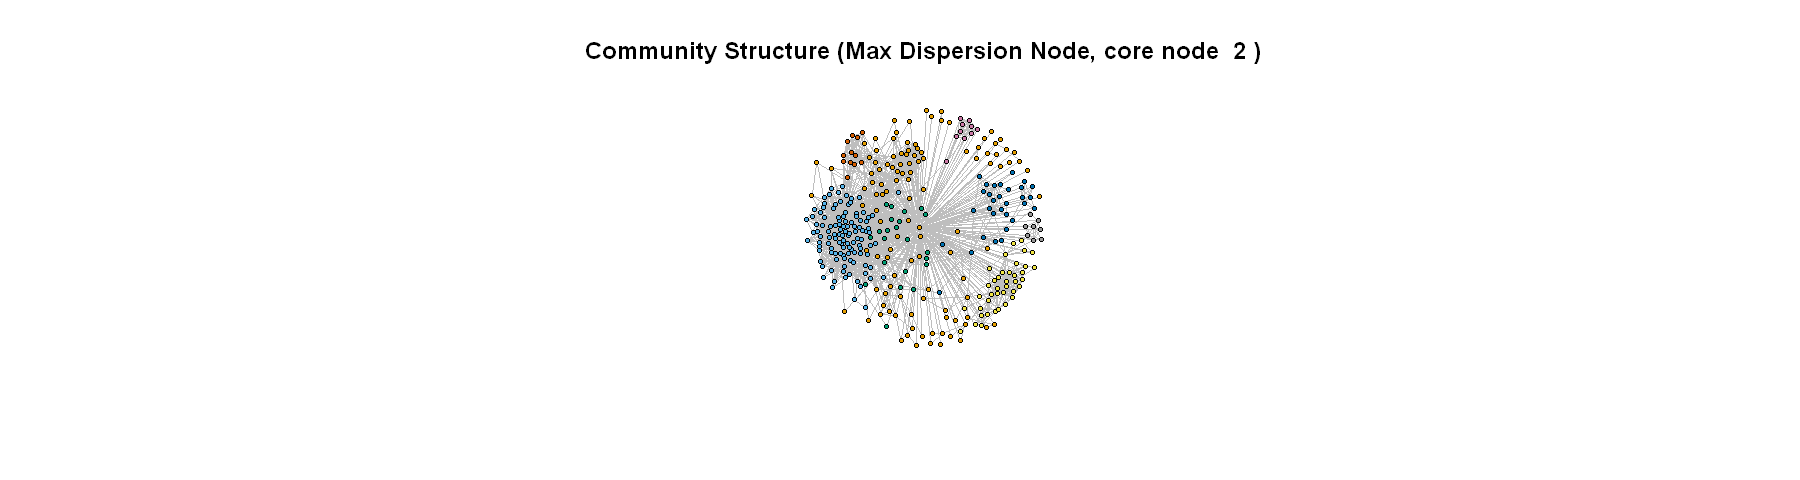

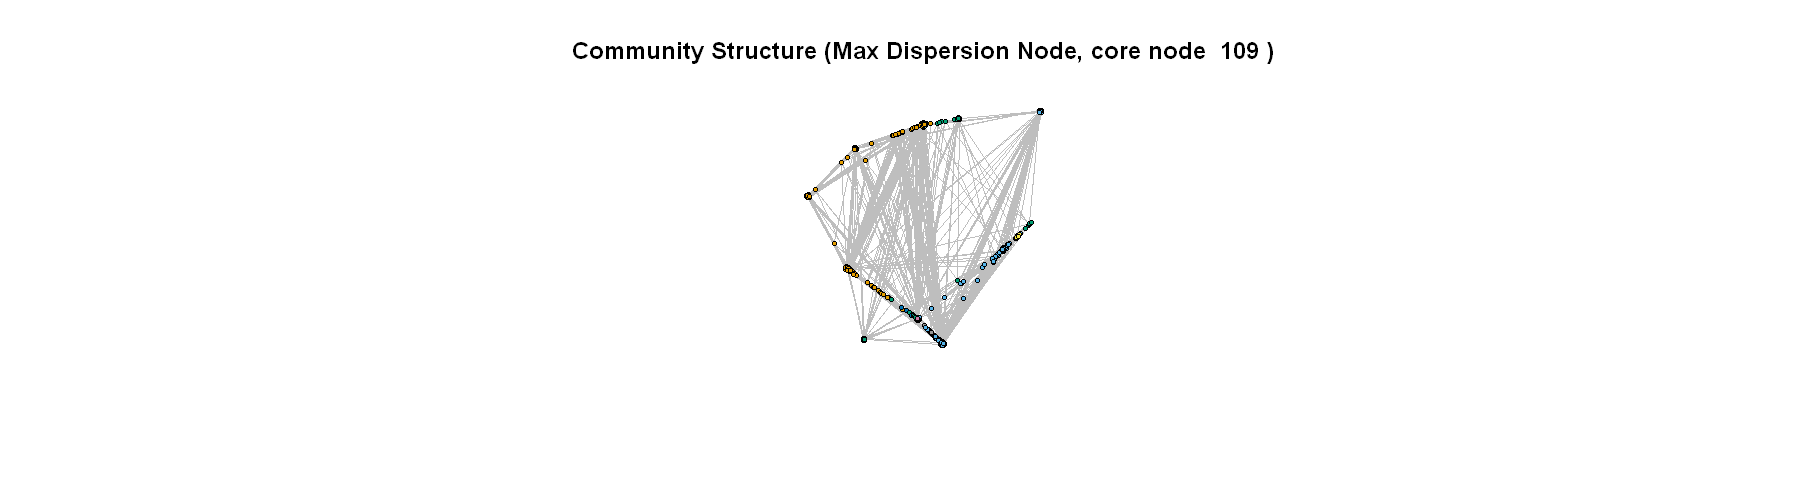

In [136]:
max_dispersion(g1)

In [141]:
# Q14
max_embed = function(g, core_list=c(1,108,349,484,1087)) {
    for (core in core_list) {
        user_neighbors = neighbors(g, core)
        user_vertices = c(core, user_neighbors)
        user_network = induced_subgraph(g, user_vertices)

        max_enode =  NA
        max_embeddedness = 0
        max_denode = NA
        max_dispersion_embeddedness = 0

        for (node in V(user_network)) {
            embed = embeddedness(user_network, core, node)
            if (embed > max_embeddedness && node != core) {
                max_embeddedness = embed
                max_enode = node
            }
            
            disp = dispersion(user_network, core, node)
            if (disp != 0 && (disp/embed) > max_dispersion_embeddedness && node != core) {
                max_dispersion_embeddedness = disp/embed
                max_denode = node
            }
        }
        community = fastgreedy.community(user_network)

        edge_color = rep("gray", length(E(user_network)))
        edge_weight = rep(0.5, length(E(user_network)))
        node_color = rep(community$membership, length(V(user_network)))
        node_size = rep(4, length(V(user_network)))
        node_label = rep(NA, length(V(user_network)))

        edge_color[which(get.edgelist(user_network, name = TRUE)[,1] == max_denode | 
                         get.edgelist(user_network, name = TRUE)[,2] == max_denode)] = "cyan";
        edge_color[which(get.edgelist(user_network, name = TRUE)[,1] == max_enode | 
                         get.edgelist(user_network, name = TRUE)[,2] == max_enode)] = "chartreuse";

        edge_weight[which(get.edgelist(user_network, name = TRUE)[,1] == max_denode |  
                          get.edgelist(user_network, name = TRUE)[,2] == max_denode |
                          get.edgelist(user_network, name = TRUE)[,1] == max_enode |
                          get.edgelist(user_network, name = TRUE)[,2] == max_enode)] = 3;

        node_color[which(V(user_network)$name == max_denode)] = "cyan";
        node_color[which(V(user_network)$name == max_enode)] = "chartreuse";

        node_size[which(V(user_network)$name == max_denode |
                       V(user_network)$name == max_enode)] = 20;

        node_label[which(V(user_network)$name == max_denode)] = max_denode;
        node_label[which(V(user_network)$name == max_enode)] = max_enode;

        print(max_enode)
        print(max_denode)
        plot(user_network, vertex.size = node_size, vertex.label = node_label,
                    edge.width = edge_weight, edge.color = edge_color, vertex.color = node_color, 
                   main = paste("Community Structure (Max dispersion/embeddedness Node, core node ", core, ")"))
    }
}

[1] 57
[1] NA
[1] 3
[1] NA


ERROR: Error in neighbors(g, node): At type_indexededgelist.c:750 : cannot get neighbors, Invalid vertex id


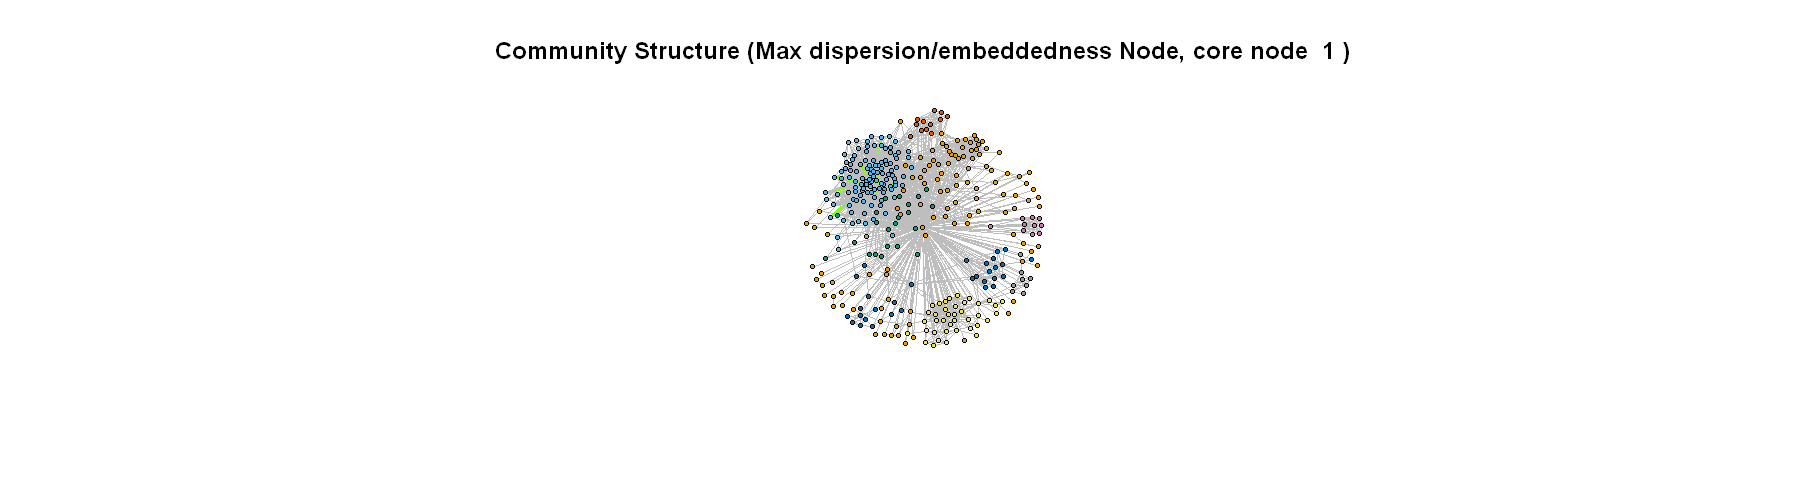

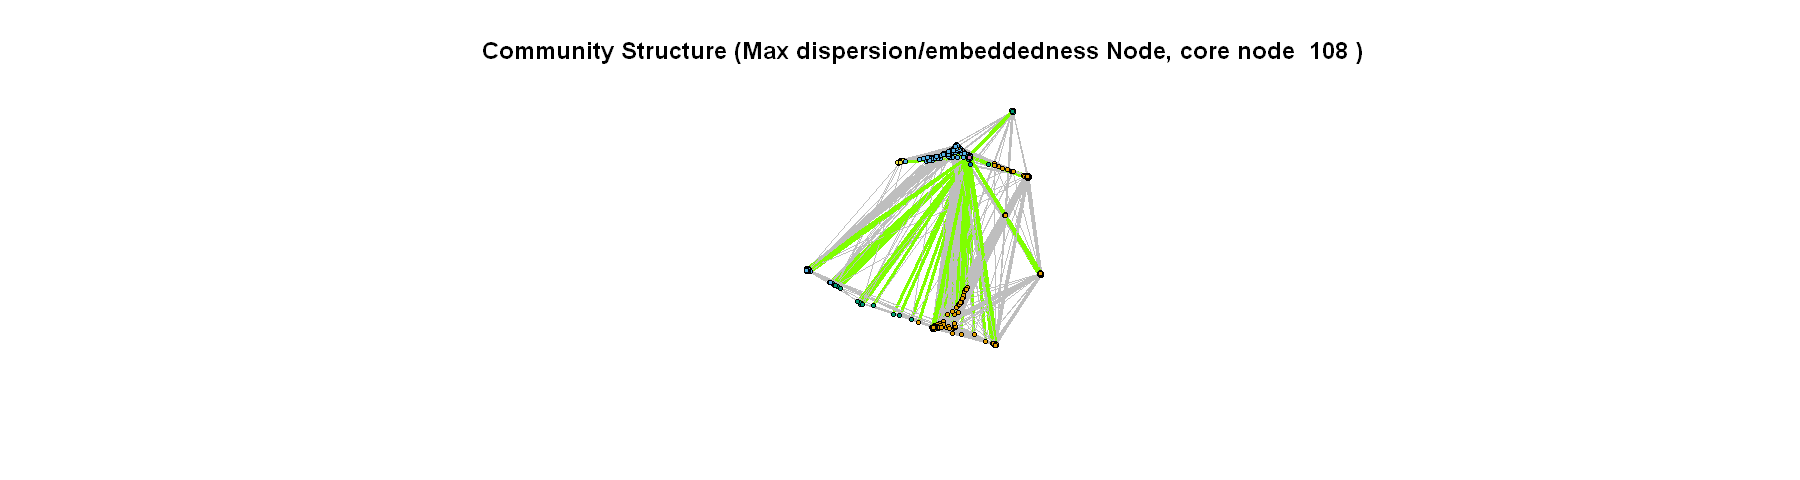

In [142]:
max_embed(facebook_graph)